In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from importlib import reload

import flow.visualize.visualize_ring as visualize_ring

import torch

# Anti-Flow specific functions for  detection:
import Detectors.Deep_Learning.AutoEncoders.utils
reload(Detectors.Deep_Learning.AutoEncoders.utils)
from Detectors.Deep_Learning.AutoEncoders.utils import sliding_window
from Detectors.Deep_Learning.AutoEncoders.cnn_lstm_ae import CNNRecurrentAutoencoder

import utils
reload(utils)
from utils import Bando_OVM_FTL

import os

print('Libraries loaded.')

1.7.1
Libraries loaded.


In [7]:
warmup_period = 500 #Wait until there's a well developed wave

emission_path = os.path.join(os.getcwd(),'data/ring_variable_cfm_20220322-1207401647968860.832596-0_emission.csv')
timeseries_dict = visualize_ring.get_sim_timeseries(csv_path=emission_path,
                                                              warmup_period=warmup_period)

Data loaded.


In [87]:
import csv

def get_veh_coordinates(csv_path,warmup_period=500):
	row_num = 1
	curr_veh_id = 'id'
	sim_dict = {}
	curr_veh_data = []

	with open(csv_path, newline='') as csvfile:
		csvreader = csv.reader(csvfile, delimiter=',')
		for row in csvreader:
			if(row_num > 1):
				# Don't read header
				if(curr_veh_id != row[1]):
					#Add in new data to the dictionary:
					
					#Store old data:
					if(len(curr_veh_data)>0):
						sim_dict[curr_veh_id] = np.array(curr_veh_data).astype(float)
					#Rest where data is being stashed:
					curr_veh_data = []
					curr_veh_id = row[1] # Set new veh id
					#Allocate space for storing:
					sim_dict[curr_veh_id] = []

				curr_veh_id = row[1]
				time = float(row[0])
				if(time > warmup_period):
					# data = [time,speed,headway,accel,leader_speed,fuel_consumption]
					data = [row[0],row[2],row[3],row[4]]
					curr_veh_data.append(data)
			row_num += 1

		#Add the very last vehicle's information:
		sim_dict[curr_veh_id] = np.array(curr_veh_data).astype(float)
		print('vehicle coordinates loaded.')
	return sim_dict    

In [90]:
veh_coordinates_dict = get_veh_coordinates(emission_path)

vehicle coordinates loaded.


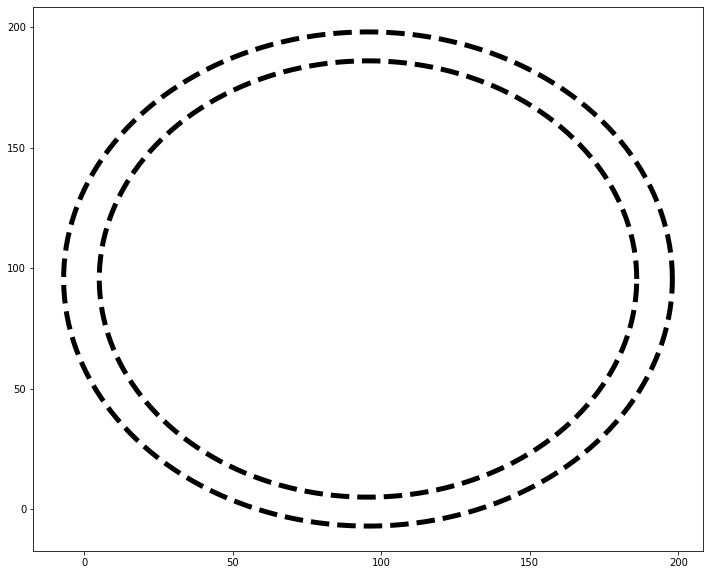

In [119]:
import matplotlib.pyplot as pt

import math

veh_ids = list(veh_coordinates_dict.keys())

ring_length = 600
radius = ring_length/(2*np.pi)

pt.figure(figsize=[12,10])

radians = np.linspace(0,2*np.pi,360)

centroid_x = radius
centroid_y = radius



inner_lane_x = centroid_x + np.cos(radians)*(radius-5)
inner_lane_y = centroid_y + np.sin(radians)*(radius-5)

outter_lane_x = centroid_x + np.cos(radians)*(radius+7)
outter_lane_y = centroid_y + np.sin(radians)*(radius+7)

pt.plot(inner_lane_x,inner_lane_y,'k--',linewidth=5)
pt.plot(outter_lane_x,outter_lane_y,'k--',linewidth=5)


x_vals = []
y_vals = []
v_vals = []

markers = [()]

for veh_id in veh_ids:
    x = veh_coordinates_dict[veh_id][0][1]
    y = veh_coordinates_dict[veh_id][0][2]
    speed = veh_coordinates_dict[veh_id][0][3]
#     print(speed)
#     pt.scatter(x,y,c=speed)
    
# pt.clim([0,10])
# pt.colorbar()
    
    x_vals.append(x)
    y_vals.append(y)
    v_vals.append(speed)
    
#     angel_of_motion = math.degrees(math.atan(1.18))
    
# marker=(4, 0, 90)


# for 



# pt.scatter(x_vals,y_vals,c=v_vals,s=100,marker=(3, 0, 90))
    
    
#     pt.plot(x,y,'k', marker=(3, 0, angel_of_motion),markersize=15, linestyle='None')



AttributeError: 'Figure' object has no attribute 'clim'

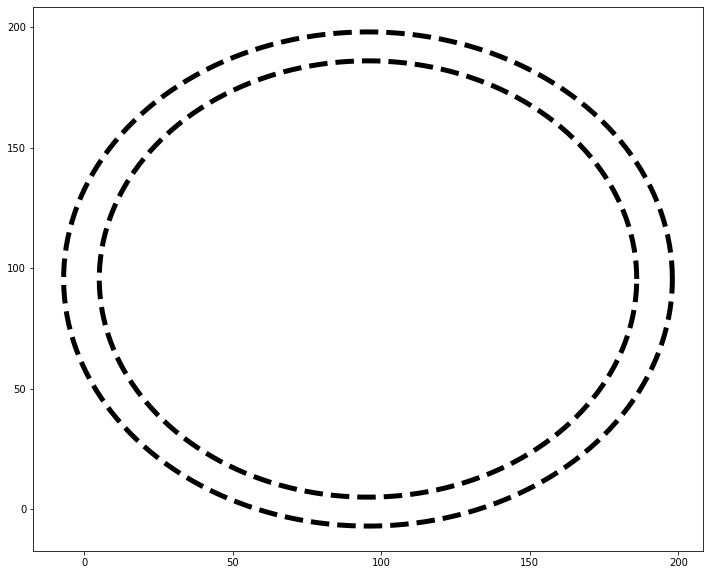

In [131]:
import matplotlib.pyplot as plt

def mscatter(x,y,c, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    ax = ax or plt.gca()
    sc = ax.scatter(x,y,c=c,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc


fig = plt.figure(figsize=[12,10])


ring_length = 600
radius = ring_length/(2*np.pi)

radians = np.linspace(0,2*np.pi,360)

centroid_x = radius
centroid_y = radius


inner_lane_x = centroid_x + np.cos(radians)*(radius-5)
inner_lane_y = centroid_y + np.sin(radians)*(radius-5)

outter_lane_x = centroid_x + np.cos(radians)*(radius+7)
outter_lane_y = centroid_y + np.sin(radians)*(radius+7)

plt.plot(inner_lane_x,inner_lane_y,'k--',linewidth=5)
plt.plot(outter_lane_x,outter_lane_y,'k--',linewidth=5)



xs = x_vals
ys = y_vals
c = v_vals

m = []

for i in range(len(x_vals)):
    angle = 0
    m.append((3,0,angle))

mscatter(xs, ys, c=c, m=m,  s=100)



plt.show()

In [111]:
import imageio
import sys


def plot_one_frame(time_index,veh_coordinates_dict,file_save_path):
    veh_ids = list(veh_coordinates_dict.keys())

    ring_length = 600
    radius = ring_length/(2*np.pi)

    fig = pt.figure(figsize=[10,10])

    radians = np.linspace(0,2*np.pi,360)

    centroid_x = radius
    centroid_y = radius

    inner_lane_x = centroid_x + np.cos(radians)*(radius-5)
    inner_lane_y = centroid_y + np.sin(radians)*(radius-5)

    outter_lane_x = centroid_x + np.cos(radians)*(radius+7)
    outter_lane_y = centroid_y + np.sin(radians)*(radius+7)

    pt.plot(inner_lane_x,inner_lane_y,'k-',linewidth=5)
    pt.plot(outter_lane_x,outter_lane_y,'k-',linewidth=5)


    for veh_id in veh_ids:
        x = veh_coordinates_dict[veh_id][time_index][1]
        y = veh_coordinates_dict[veh_id][time_index][2]
    
        pt.plot(x,y,'k.', markersize=15)
    
    file_name = os.path.join(file_save_path,'image_'+str(time_index)+'.png')
    
    fig.tight_layout()
    
    pt.savefig(file_name)
    
    pt.close(fig)
    

    
    
def plot_one_frame_with_color(time_index,veh_coordinates_dict,file_save_path):
    veh_ids = list(veh_coordinates_dict.keys())

    ring_length = 600
    radius = ring_length/(2*np.pi)

    fig = pt.figure(figsize=[12,10])

    radians = np.linspace(0,2*np.pi,360)

    centroid_x = radius
    centroid_y = radius

    inner_lane_x = centroid_x + np.cos(radians)*(radius-5)
    inner_lane_y = centroid_y + np.sin(radians)*(radius-5)

    outter_lane_x = centroid_x + np.cos(radians)*(radius+7)
    outter_lane_y = centroid_y + np.sin(radians)*(radius+7)

    pt.plot(inner_lane_x,inner_lane_y,'k-',linewidth=5)
    pt.plot(outter_lane_x,outter_lane_y,'k-',linewidth=5)

    x_vals = []
    y_vals = []
    v_vals = []

    for veh_id in veh_ids:
        x = veh_coordinates_dict[veh_id][time_index][1]
        y = veh_coordinates_dict[veh_id][time_index][2]
        v = veh_coordinates_dict[veh_id][time_index][3]
        
        x_vals.append(x)
        y_vals.append(y)
        v_vals.append(v)
    
#         pt.plot(x,y,'k.', markersize=15)


    pt.scatter(x_vals,y_vals,c=v_vals,s=100)
    pt.clim([0,10])
    pt.colorbar()

    file_name = os.path.join(file_save_path,'image_'+str(time_index)+'.png')
    
    fig.tight_layout()
    
    pt.savefig(file_name)
    
    pt.close(fig)
    
    
    
# file_save_path = os.path.join(os.getcwd(),'ring_with_attack_complete_images')

# plot_one_frame(0,veh_coordinates_dict,file_save_path)
# print('Plotted first image')

In [109]:

def plot_vehicles_on_ring(veh_coordinates_dict,file_save_path,plot_frequency=10,want_color=True):
    veh_ids = list(veh_coordinates_dict.keys())
    num_frames_to_plot = len(veh_coordinates_dict[veh_ids[0]])
    
    frames_to_plot = list(np.arange(0,num_frames_to_plot,plot_frequency))
    print('Frame number: ')
    
    for frame in frames_to_plot:
        if(want_color):
            plot_one_frame_with_color(frame,veh_coordinates_dict,file_save_path)
        else:
            plot_one_frame(frame,veh_coordinates_dict,file_save_path)
        sys.stdout.write('\r'+str(frame))
        
    print('Finished saving images.')
    
    
    file_names = []
    for frame in frames_to_plot:
        file_names.append('image_'+str(frame)+'.png')
    
    return file_names

In [70]:
file_names_copy = []
for file_name in file_names:
    file_names_copy.append(file_name+'.png')
file_names = file_names_copy
print(file_names[0])

image_0.png


In [57]:
def make_gif_of_sim(path_to_image_files,file_names,gif_file_name):
    
    #file_names should be an in order list of the files to plot:
    images = []
    for filename in file_names:
        if(filename[-3:]=='png'):
            file_path = os.path.join(path_to_image_files,filename)
            images.append(imageio.imread(file_path))

    gif_file_name = os.path.join(os.getcwd(),gif_file_name)
    
    imageio.mimsave(gif_file_name , images)
    
    print('Gif created.')

Gif created.


# Complete observation with attack:

In [138]:
# emission_path = os.path.join(os.getcwd(),'data/ring_variable_cfm_20220322-1207401647968860.832596-0_emission.csv')

emission_path = 'data/mixed_with_attack_with_wave.csv'

veh_coordinates_dict_full = get_veh_coordinates(emission_path)

veh_ids = list(veh_coordinates_dict_full.keys())

stop_time = 600

veh_coordinates_dict = dict.fromkeys(veh_ids)

for veh_id in veh_ids:
    veh_coordinates_dict[veh_id] = []

for veh_id in veh_ids:
    veh_coordinate_data = veh_coordinates_dict_full[veh_id]
    for datum in veh_coordinate_data:
        
        if(datum[0]<stop_time):
            veh_coordinates_dict[veh_id].append(datum)
        
print('Extracted shortened time stretch.')


vehicle coordinates loaded.
Extracted shortened time stretch.


In [117]:
# Make animation:

file_save_path = os.path.join(os.getcwd(),'ring_with_attack_complete_images/')
    
file_names = plot_vehicles_on_ring(veh_coordinates_dict,file_save_path,plot_frequency=5)

Frame number: 
995Finished saving images.


In [118]:
path_to_image_files = os.path.join(os.getcwd(),'ring_with_attack_complete_images/')
gif_file_name = 'ring_with_attack_complete.gif'
make_gif_of_sim(path_to_image_files,file_names,gif_file_name)

print('Finished.')

Gif created.
Finished.


# Complete observation with no attack:

In [113]:
# emission_path_no_attack = 'data/ring_variable_cfm_20220322-1757051647989825.896609-0_emission.csv'
emission_path_no_attack = 'data/mixed_no_attack_no_wave.csv'

veh_coordinates_dict_full_no_attack = get_veh_coordinates(emission_path_no_attack)

veh_ids_no_attack = list(veh_coordinates_dict_full_no_attack.keys())

stop_time = 600

veh_coordinates_dict_no_attack = dict.fromkeys(veh_ids_no_attack)
for veh_id in veh_ids_no_attack:
    veh_coordinates_dict_no_attack[veh_id] = []

for veh_id in veh_ids_no_attack:
    veh_coordinate_data_no_attack = veh_coordinates_dict_full_no_attack[veh_id]
    for datum in veh_coordinate_data_no_attack:
        
        if(datum[0]<stop_time):
            veh_coordinates_dict_no_attack[veh_id].append(datum)
        
print('Extracted shortened time stretch.')

vehicle coordinates loaded.
Extracted shortened time stretch.


In [114]:
# Make animation:

file_save_path = os.path.join(os.getcwd(),'ring_no_attack_complete_images/')
    
file_names = plot_vehicles_on_ring(veh_coordinates_dict_no_attack,file_save_path,plot_frequency=5)

Frame number: 
995Finished saving images.


In [115]:
path_to_image_files = os.path.join(os.getcwd(),'ring_no_attack_complete_images/')
gif_file_name = 'ring_no_attack_complete.gif'
make_gif_of_sim(path_to_image_files,file_names,gif_file_name)

print('Finished.')

Gif created.
Finished.


# Partial observation with attack:

In [139]:
stop_time = 600

veh_ids = list(veh_coordinates_dict_full.keys())

GPS_penetration_rate = 0.2

num_measured_vehicle_ids = int(np.floor(len(veh_ids)*GPS_penetration_rate))
measured_veh_ids = list(veh_coordinates_dict_full.keys())

for i in range(len(measured_veh_ids)-num_measured_vehicle_ids):
    rand_int = np.random.randint(0,len(measured_veh_ids))
    del measured_veh_ids[rand_int]


veh_coordinates_dict_partial = dict.fromkeys(measured_veh_ids)

for veh_id in measured_veh_ids:
    veh_coordinates_dict_partial[veh_id] =  veh_coordinates_dict[veh_id]

In [140]:
veh_ids  = list(veh_coordinates_dict_partial.keys())
print(len(veh_coordinates_dict_partial[veh_ids[0]]))

999


In [141]:
# Make animation:

file_save_path = os.path.join(os.getcwd(),'ring_with_attack_incomplete_images/')
    
file_names = plot_vehicles_on_ring(veh_coordinates_dict_partial,file_save_path,plot_frequency=5)

Frame number: 
995Finished saving images.


In [142]:
path_to_image_files = os.path.join(os.getcwd(),'ring_with_attack_incomplete_images/')
gif_file_name = 'ring_with_attack_incomplete.gif'
make_gif_of_sim(path_to_image_files,file_names,gif_file_name)

print('Finished.')

Gif created.
Finished.


# Use OpenCV to make a video:

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3]
for i in x:
    plt.plot(i, i, marker=(3, 0, i*90), markersize=20, linestyle='None')

plt.xlim([0,4])
plt.ylim([0,4])

plt.show()

In [ ]:
import cv2
import numpy as np
import glob

frameSize = (500, 500)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)

for filename in glob.glob('D:/images/*.jpg'):
    img = cv2.imread(filename)
    out.write(img)

out.release()